In [3395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm

In [3396]:
dataframe = pd.read_csv("./heart.csv")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3397]:
dataframe["target"] = dataframe["target"].replace(0, -1)
dataframe.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
385,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
272,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
553,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,-1


In [3398]:
def scalerTranfrom(features):
    new_features = features
    l2_norm = np.linalg.norm(new_features, 2, axis=1, keepdims=True)
    l2_normlized_feature = new_features / l2_norm
    
    return l2_normlized_feature

In [3399]:
features = np.array(dataframe.drop(columns="target"))
labels = np.array(dataframe["target"])

# print(features.shape)
# features = scalerTranfrom(features)

features_train, features_test, labels_train, labels_test = train_test_split(features, labels)

In [3400]:
import time
# Support Vector Machine classifiers by kernel which is linear.
class SVM:
    def __init__(self, c=1, learning_rate=1):
        self.cost = c
        self.learning_rate = learning_rate
        self.array_loss = np.array([])
        self.b = 0
    
    def fit(self, features_train, labels_train):
        
        #store info
        self.d = features_train.shape[1]
        self.n_record = features_train.shape[0]
        
        # set up features and labels
        self.features = features_train
        self.labels = labels_train

        # set vector of weight by d dimensions
        self.weight = np.zeros(self.d)
        
        for i in range(100):
            self.weight = self.computeWeight(self.weight, self.features, self.labels, self.n_record) # compute to get weight's value
            loss = self.hinge_loss(self.weight, self.features, self.labels)
            self.array_loss = np.append(self.array_loss, loss)

        
    def computeWeight(self, weight, feature_train, labels_train, n_record):
        new_weight = weight
        for i in range(n_record):
            check = labels_train[i] * (np.inner(new_weight, feature_train[i]) + self.b)
            if check < 1:
                new_weight = new_weight - self.learning_rate * (new_weight - np.inner(labels_train[i], feature_train[i]))
                self.b += labels_train[i]
            else:
                new_weight = new_weight - self.learning_rate * new_weight
            
        return new_weight
    
    def predict(self, feature_test):
        check = np.inner(self.weight, feature_test) + self.b
        if check >= 0 :
            # positive class
            return 1 
        else:
            # negative class
            return -1
    
    def hinge_loss(self, weight, features, labels):
        result = 0
        for i in range(self.n_record):
            check = 1-labels[i] * (np.inner(weight, features[i]) + self.b)
            if check > result:
                result = check
        return result
    
    def score(self, features_test, labels_test):
        size = features_test.shape[0]
        point = 0
        for i in range(size):
            y_predict = self.predict(features_test[i])
            if y_predict == labels_test[i]:
                point += 1
        
        return np.round(point / size, 4)
            

In [3401]:
model = SVM(c=50, learning_rate=0.01)
model.fit(features_train, labels_train)
print(model.weight)

[-0.17921759 -0.06060483  0.17364807  1.32584571 -1.15279871 -0.00855688
  0.0384778   4.91585795 -0.09998935 -0.18617494  0.0905129  -0.14258988
 -0.05011516]


In [3402]:
model.score(features_test, labels_test)

0.5019

In [3403]:
model.score(features_train, labels_train)

0.5169

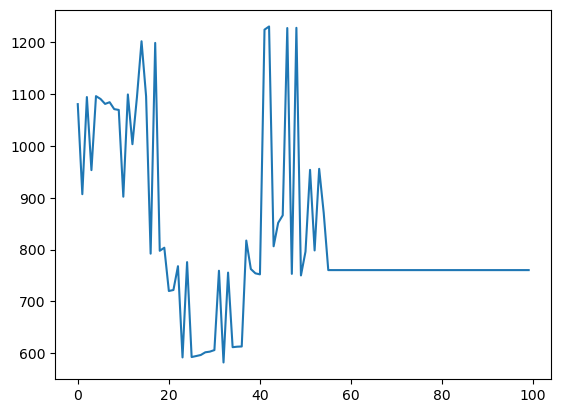

In [3404]:
plt.plot(model.array_loss)
plt.show()

In [3405]:
# Model Selection
class ModelSelection:
    def __init__(self, features, labels , model):
        self.features = features
        self.labels = labels
        self.model = model
        pass